## City Bike Analytics
### Data Source: https://www.citibikenyc.com/system-data
### ETL process
* Data of trips history for September (2018-2020)
* Saving result to csv file for further visualization with Tableau

#### Import libraries for analysis

In [ ]:
library(ggplot2)
theme_set(
  theme_bw() +
    theme(legend.position = "top")
  )

In [63]:
library('lattice')
library(tidyverse)
library(plyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




#### Load data
* September 2018

In [45]:
raw.data_2018 <- read.csv("data/JC-201809-citibike-tripdata.csv", stringsAsFactors=TRUE)
str(raw.data_2018)

'data.frame':	39022 obs. of  15 variables:
 $ tripduration           : int  284 370 1181 383 377 497 426 138 280 2026 ...
 $ starttime              : Factor w/ 39021 levels "2018-09-01 00:03:06.9060",..: 27 28 121 127 128 162 190 204 254 260 ...
 $ stoptime               : Factor w/ 39021 levels "2018-09-01 00:06:04.7190",..: 23 24 129 121 120 158 184 195 242 286 ...
 $ start.station.id       : int  3183 3183 3183 3183 3183 3183 3183 3183 3183 3183 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 14 14 14 14 14 14 14 14 14 14 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -74 -74 ...
 $ end.station.id         : int  3267 3214 3192 3213 3213 3202 3185 3681 3276 3276 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 47 20 39 60 60 51 13 24 43 43 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74.1 -74 -74 ...
 $ bi

In [22]:
# Test for missing values
colSums(is.na(raw.data_2018))
na_index_list <- which(is.na(raw.data_2018))
na_index_list

tripduration               starttime                stoptime 
                      0                       0                       0 
       start.station.id      start.station.name  start.station.latitude 
                      0                       0                       0 
start.station.longitude          end.station.id        end.station.name 
                      0                       0                       0 
   end.station.latitude   end.station.longitude                  bikeid 
                      0                       0                       0 
               usertype              birth.year                  gender 
                      0                       0                       0 
                    age                log_trip 
                      0                       0

integer(0)

In [18]:
# Adding age column
raw.data_2018$age <- 2018 - raw.data_2018$birth.year
summary(raw.data_2018$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.00   35.00   37.07   44.00  130.00 

In [21]:
# Checking for unusual data
raw.data_2018$age[raw.data_2018$age>70]

[1]  79  74  74  74 130 130 130  76 130 130  76 130  76 130 118  71 130 130 130
[20] 130 130 130 130 130 130 130 130 130  75  76 130  74  74  74  74  74  74  71
[39]  71  71  71  71 130 130 130  79 118  71

In [31]:
# Filter raw data to clean data
clean.data_2018 <- raw.data_2018 %>% filter(raw.data_2018$age<80)

In [32]:
# Adding column with log transformed trip duration
clean.data_2018$log_trip <- log(clean.data_2018$tripduration)

In [54]:
# Adding column with year
clean.data_2018$year <- 'Sep 2018'

In [60]:
# Rename gender factor variables
clean.data_2018$gender[clean.data_2018$gender==1]<-'M'
clean.data_2018$gender[clean.data_2018$gender==2]<-'F'
clean.data_2018$gender[clean.data_2018$gender==0]<-'NA'

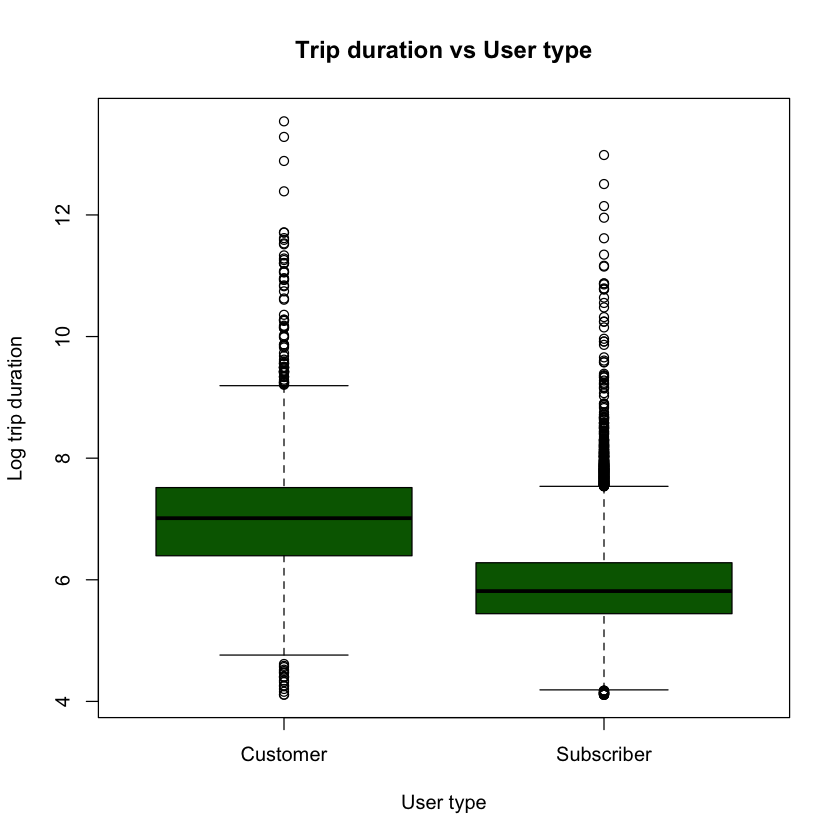

In [52]:
boxplot(log_trip~usertype, data=clean.data_2018, main="Trip duration vs User type", col="darkgreen",
   xlab="User type", ylab="Log trip duration")

Warning message in histogram.factor(clean.data_2018$start.station.name, data = clean.data_2018):
“explicit 'data' specification ignored”


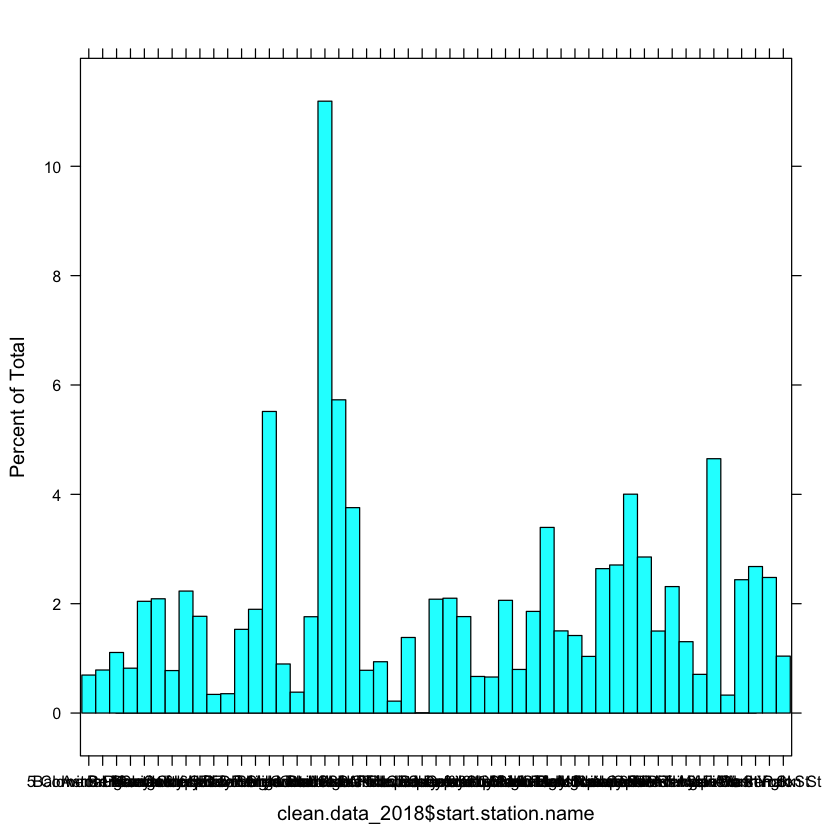

In [34]:
histogram(clean.data_2018$start.station.name, data = clean.data_2018)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


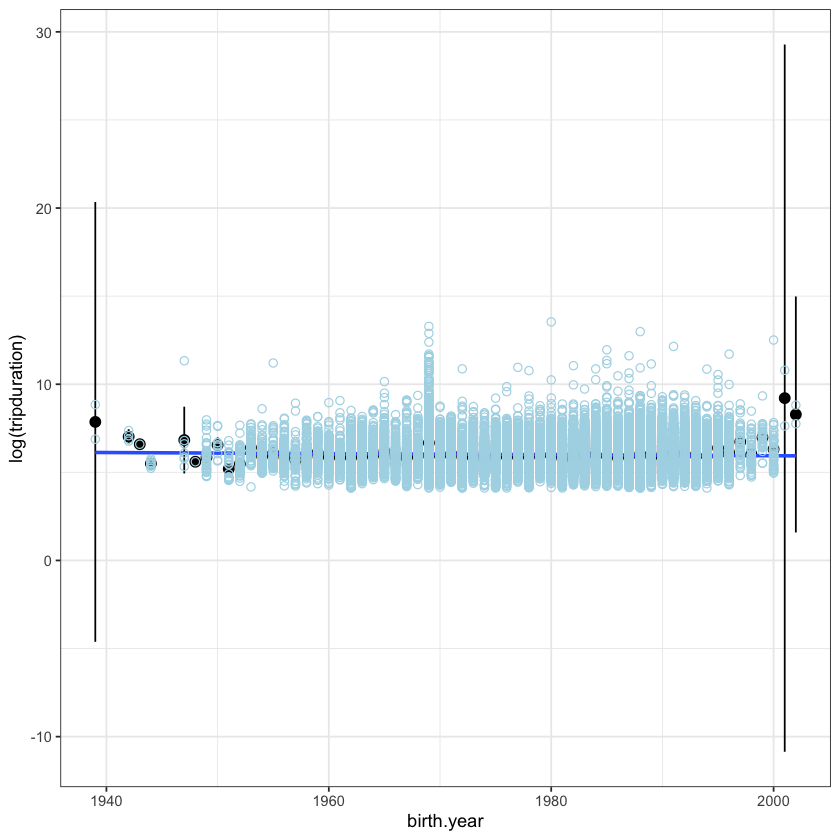

In [35]:
ggplot(clean.data_2018, aes(birth.year, log(tripduration))) + stat_summary(fun.data= mean_cl_normal) + 
  geom_smooth(method='lm')  + geom_point(na.rm=TRUE, color="lightblue", size=2, pch=21)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing missing values (geom_segment).”


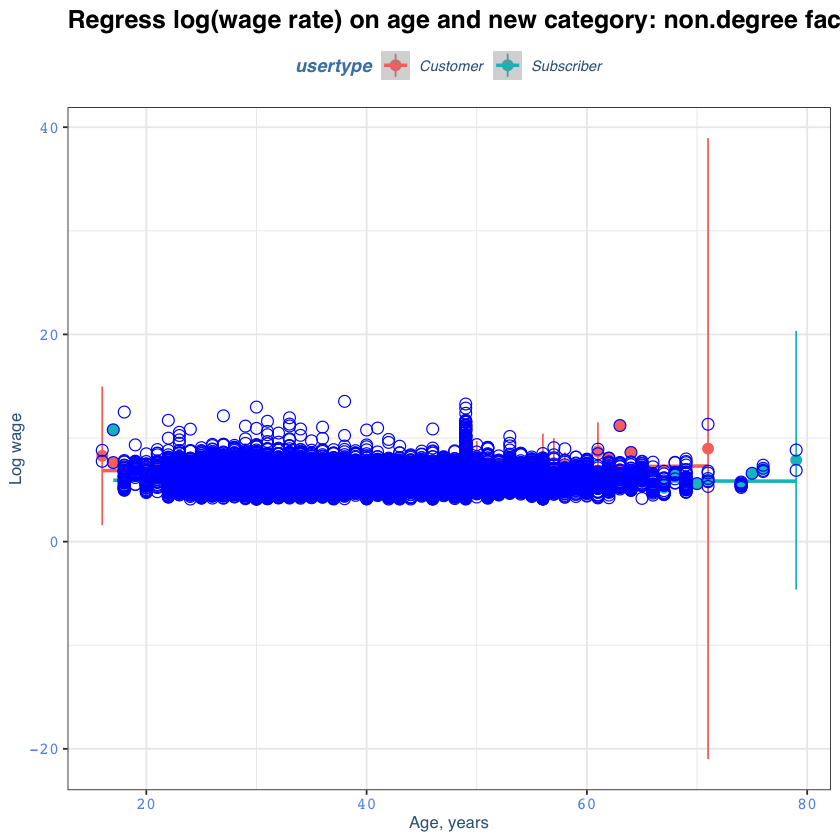

In [42]:
# plot 
degree_plot <- ggplot(clean.data_2018, aes(age, log_trip, color = usertype)) + stat_summary(fun.data= mean_cl_normal) + 
  geom_smooth(method='lm')  + geom_point(na.rm=TRUE, color="blue", size=3, pch=21)
mynamestheme <- theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
                 legend.title = element_text(colour = "steelblue",  face = "bold.italic", family = "Helvetica"), 
                 legend.text = element_text(face = "italic", colour="steelblue4",family = "Helvetica"), 
                  axis.title = element_text(family = "Helvetica", size = (10), colour = "steelblue4"),
                  axis.text = element_text(family = "Courier", colour = "cornflowerblue", size = (10)))
  
print(degree_plot + mynamestheme + labs( title= "Regress log(wage rate) on age and new category: non.degree factor", y="Log wage", x = "Age, years"))

#### Load data
* September 2019

In [44]:
raw.data_2019 <- read.csv("data/JC-201909-citibike-tripdata.csv", stringsAsFactors=TRUE)
str(raw.data_2018)

'data.frame':	49244 obs. of  15 variables:
 $ tripduration           : int  145 212 569 1380 1346 748 137 631 1796 1760 ...
 $ starttime              : Factor w/ 49244 levels "2019-09-01 00:00:37.6920",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 49244 levels "2019-09-01 00:03:03.0100",..: 1 2 4 8 7 5 3 6 13 14 ...
 $ start.station.id       : int  3640 3194 3214 3214 3214 3185 3214 3184 3199 3199 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 28 35 14 14 14 8 14 43 41 41 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74.1 -74.1 -74 -74 -74 ...
 $ end.station.id         : int  3206 3679 3184 3792 3792 3280 3214 3187 3199 3199 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 29 6 54 13 13 3 19 64 52 52 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74.1 -74.1 -74 -74 -74 ...
 $ bikeid                 : int  

In [46]:
# Test for missing values
colSums(is.na(raw.data_2019))
na_index_list <- which(is.na(raw.data_2019))
na_index_list

tripduration               starttime                stoptime 
                      0                       0                       0 
       start.station.id      start.station.name  start.station.latitude 
                      0                       0                       0 
start.station.longitude          end.station.id        end.station.name 
                      0                       0                       0 
   end.station.latitude   end.station.longitude                  bikeid 
                      0                       0                       0 
               usertype              birth.year                  gender 
                      0                       0                       0

integer(0)

In [47]:
# Adding age column
raw.data_2019$age <- 2019 - raw.data_2019$birth.year
summary(raw.data_2019$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   16.0    30.0    35.0    37.4    44.0   131.0 

In [48]:
# Checking for unusual data
raw.data_2019$age[raw.data_2019$age>70]

[1] 131 131 119  78 131  78 131 131 131 131 131 131  78 119 131 131  78  72  72
[20]  72  72  72 131  72  72  72  75  78  72  78  72 131  75  75  78 131 119 131
[39]  73 131  72  73  72 131  75 131 131 131  75 131 119 119 131  72 131

In [49]:
# Filter raw data to clean data
clean.data_2019 <- raw.data_2019 %>% filter(raw.data_2019$age<80)

In [50]:
# Adding column with log transformed trip duration
clean.data_2019$log_trip <- log(clean.data_2019$tripduration)

In [53]:
# Adding column with year
clean.data_2019$year <- 'Sep 2019'

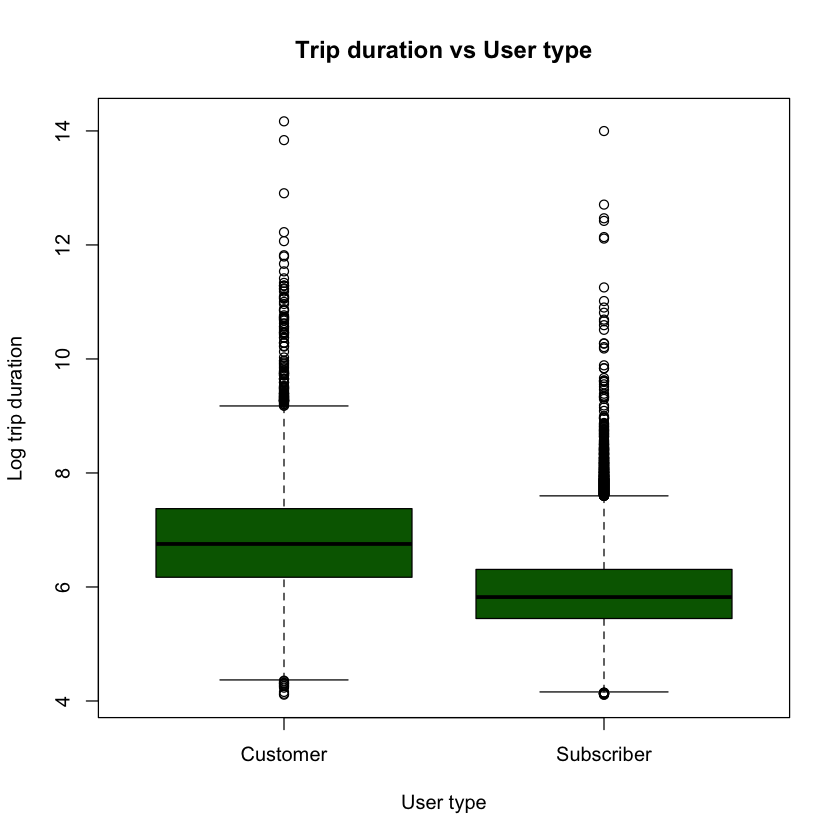

In [51]:
boxplot(log_trip~usertype, data=clean.data_2019, main="Trip duration vs User type", col="darkgreen",
   xlab="User type", ylab="Log trip duration")

In [58]:
# Rename gender factor variables
clean.data_2019$gender[clean.data_2019$gender==1]<-'M'
clean.data_2019$gender[clean.data_2019$gender==2]<-'F'
clean.data_2019$gender[clean.data_2019$gender==0]<-'NA'

In [66]:
str(clean.data_2019)

'data.frame':	49216 obs. of  18 variables:
 $ tripduration           : int  145 212 569 1380 1346 748 137 631 1796 1760 ...
 $ starttime              : Factor w/ 49244 levels "2019-09-01 00:00:37.6920",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 49244 levels "2019-09-01 00:03:03.0100",..: 1 2 4 8 7 5 3 6 13 14 ...
 $ start.station.id       : int  3640 3194 3214 3214 3214 3185 3214 3184 3199 3199 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 28 35 14 14 14 8 14 43 41 41 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74.1 -74.1 -74 -74 -74 ...
 $ end.station.id         : int  3206 3679 3184 3792 3792 3280 3214 3187 3199 3199 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 29 6 54 13 13 3 19 64 52 52 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74.1 -74.1 -74 -74 -74 ...
 $ bikeid                 : int  

In [67]:
merge_data <- full_join(clean.data_2018, clean.data_2019)
str(merge_data)

Joining, by = c("tripduration", "starttime", "stoptime", "start.station.id", "start.station.name", "start.station.latitude", "start.station.longitude", "end.station.id", "end.station.name", "end.station.latitude", "end.station.longitude", "bikeid", "usertype", "birth.year", "gender", "age", "log_trip", "year")



'data.frame':	88213 obs. of  18 variables:
 $ tripduration           : int  284 370 1181 383 377 497 426 138 280 2026 ...
 $ starttime              : Factor w/ 88265 levels "2018-09-01 00:03:06.9060",..: 27 28 121 127 128 162 190 204 254 260 ...
 $ stoptime               : Factor w/ 88265 levels "2018-09-01 00:06:04.7190",..: 23 24 129 121 120 158 184 195 242 286 ...
 $ start.station.id       : int  3183 3183 3183 3183 3183 3183 3183 3183 3183 3183 ...
 $ start.station.name     : Factor w/ 53 levels "5 Corners Library",..: 14 14 14 14 14 14 14 14 14 14 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -74 -74 ...
 $ end.station.id         : int  3267 3214 3192 3213 3213 3202 3185 3681 3276 3276 ...
 $ end.station.name       : Factor w/ 82 levels "12 Ave & W 40 St",..: 47 20 39 60 60 51 13 24 43 43 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74.1 -74 -74 ...
 $ bi

In [69]:
write.csv(x=merge_data, file="data/bike_data.csv")